<h1>Разведочный анализ данных. Исследование и визуализация данных.</h1>

<h3>1) Текстовое описание набора данных</h3>



В качестве набора данных был выбран известный датасет бостонского жилья. 

Описание колонок:
  - <b>crim</b> -
  per capita crime rate by town.

  - <b>zn</b> -
  proportion of residential land zoned for lots over 25,000 sq.ft.

  - <b>indus</b> -
  proportion of non-retail business acres per town.

  - <b>chas</b> -
  Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

  - <b>nox</b> -
  nitrogen oxides concentration (parts per 10 million).

  - <b>rm</b> -
  average number of rooms per dwelling.

  - <b>age</b> -
  proportion of owner-occupied units built prior to 1940.

  - <b>dis</b> -
  weighted mean of distances to five Boston employment centres.

  - <b>rad</b> -
  index of accessibility to radial highways.

  - <b>tax</b> -
  full-value property-tax rate per \$10,000.

  - <b>ptratio</b> -
  pupil-teacher ratio by town.

  - <b>black</b> -
  1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

  - <b>lstat</b> -
  lower status of the population (percent).

  - <b>medv</b> -
  median value of owner-occupied homes in \$1000s.

Переменная medv является целевой.

<h4>Импорт библиотек</h4>



In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<h4>Загрузка данных</h4>

In [57]:
data_path = 'data/Boston.csv'
df = pd.read_csv(data_path)


<h3>2) Основные характеристики датасета</h3>

Первые пять строчек

In [58]:
df.head()

Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0           1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio   black  lstat  medv  
0  296     15.3  396.90   4.98  24.0  
1  242     17.8  396.90   9.14  21.6  
2  242     17.8  392.83   4.03  34.7  
3  222     18.7  394.63   2.94  33.4  
4  222     18.7  396.90   5.33  36.2

Определим размер датасета

In [59]:
df.shape

(506, 15)

In [60]:
total_count = df.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 506


In [61]:
columns = df.columns
print('Колонки: {}'.format(columns))

Колонки: Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')


Список колонок с типами данных:

In [62]:
df.dtypes

Unnamed: 0      int64
crim          float64
zn            float64
indus         float64
chas            int64
nox           float64
rm            float64
age           float64
dis           float64
rad             int64
tax             int64
ptratio       float64
black         float64
lstat         float64
medv          float64
dtype: object

Проверка наличия пустых значений

In [63]:
cols_with_nulls = []
for col in df.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = df[df[col].isnull()].shape[0]
    if temp_null_count: cols_with_nulls.append(col)
    print('{} - {}'.format(col, temp_null_count))

if len(cols_with_nulls):
    print('Есть пустые значения')
else:
    print('Пустых значений нет')

Unnamed: 0 - 0
crim - 0
zn - 0
indus - 0
chas - 0
nox - 0
rm - 0
age - 0
dis - 0
rad - 0
tax - 0
ptratio - 0
black - 0
lstat - 0
medv - 0
Пустых значений нет


Основные статистические характеристки набора данных

In [64]:
df.describe()

Unnamed: 0        crim          zn       indus        chas         nox  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean   253.500000    3.613524   11.363636   11.136779    0.069170    0.554695   
std    146.213884    8.601545   23.322453    6.860353    0.253994    0.115878   
min      1.000000    0.006320    0.000000    0.460000    0.000000    0.385000   
25%    127.250000    0.082045    0.000000    5.190000    0.000000    0.449000   
50%    253.500000    0.256510    0.000000    9.690000    0.000000    0.538000   
75%    379.750000    3.677083   12.500000   18.100000    0.000000    0.624000   
max    506.000000   88.976200  100.000000   27.740000    1.000000    0.871000   

               rm         age         dis         rad         tax     ptratio  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     6.284634   68.574901    3.795043    9.549407  408.237154   18.455534   
std      0.702617   28.148861    2.105710    8.707259  168.537116    2.164946   
min      3.561000    2.900000    1.129600    1.000000  187.000000   12.600000   
25%      5.885500   45.025000    2.100175    4.000000  279.000000   17.400000   
50%      6.208500   77.500000    3.207450    5.000000  330.000000   19.050000   
75%      6.623500   94.075000    5.188425   24.000000  666.000000   20.200000   
max      8.780000  100.000000   12.126500   24.000000  711.000000   22.000000   

            black       lstat        medv  
count  506.000000  506.000000  506.000000  
mean   356.674032   12.653063   22.532806  
std     91.294864    7.141062    9.197104  
min      0.320000    1.730000    5.000000  
25%    375.377500    6.950000   17.025000  
50%    391.440000   11.360000   21.200000  
75%    396.225000   16.955000   25.000000  
max    396.900000   37.970000   50.000000

Определим уникальные значения для целевого признака - medv

In [65]:
df['medv'].unique()

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 13.6, 19.6, 15.2, 14.5,
       15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 13.2, 13.1, 13.5, 20. ,
       24.7, 30.8, 34.9, 26.6, 25.3, 21.2, 19.3, 14.4, 19.4, 19.7, 20.5,
       25. , 23.4, 35.4, 31.6, 23.3, 18.7, 16. , 22.2, 33. , 23.5, 22. ,
       17.4, 20.9, 24.2, 22.8, 24.1, 21.4, 20.8, 20.3, 28. , 23.9, 24.8,
       22.5, 23.6, 22.6, 20.6, 28.4, 38.7, 43.8, 33.2, 27.5, 26.5, 18.6,
       20.1, 19.5, 19.8, 18.8, 18.5, 18.3, 19.2, 17.3, 15.7, 16.2, 18. ,
       14.3, 23. , 18.1, 17.1, 13.3, 17.8, 14. , 13.4, 11.8, 13.8, 14.6,
       15.4, 21.5, 15.3, 17. , 41.3, 24.3, 27. , 50. , 22.7, 23.8, 22.3,
       19.1, 29.4, 23.2, 24.6, 29.9, 37.2, 39.8, 37.9, 32.5, 26.4, 29.6,
       32. , 29.8, 37. , 30.5, 36.4, 31.1, 29.1, 33.3, 30.3, 34.6, 32.9,
       42.3, 48.5, 24.4, 22.4, 28.1, 23.7, 26.7, 30.1, 44.8, 37.6, 46.7,
       31.5, 31.7, 41.7, 48.3, 29. , 25.1, 17.6, 24

<h3>3) Визуальное исследование датасета</h3>

Для визуального исследования могут быть использованы различные виды диаграмм, мы построим только некоторые варианты диаграмм, которые используются достаточно часто.

<h4>Диаграмма рассеяния</h4>

<AxesSubplot:xlabel='rm', ylabel='medv'>

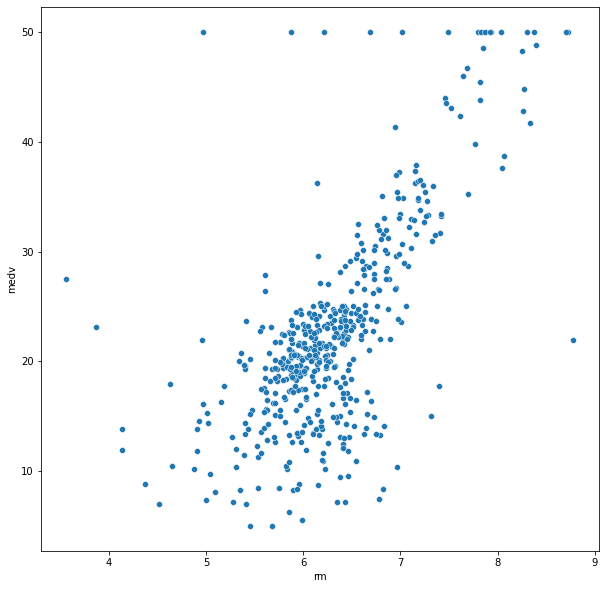

In [66]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='rm', y='medv', data=df)

<AxesSubplot:xlabel='rm', ylabel='medv'>

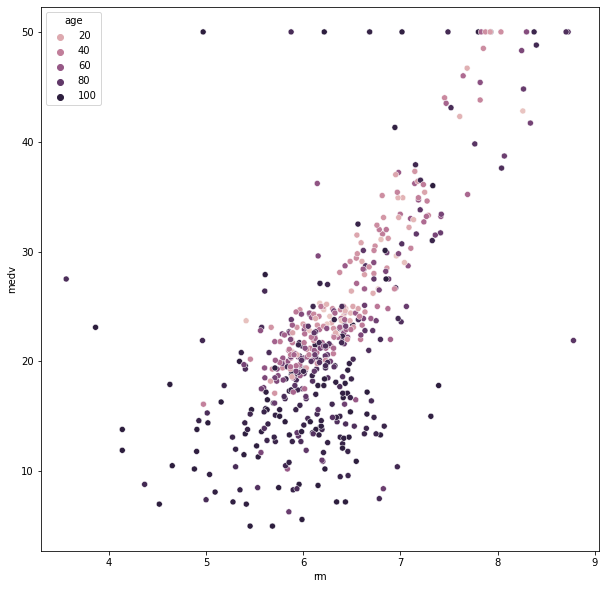

In [67]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='rm', y='medv', data=df, hue='age')

<h4>Гистограмма<h4>

/Users/feelsbadmans/Univer/bmstu-6-sem-tmo/.venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rm', ylabel='Density'>

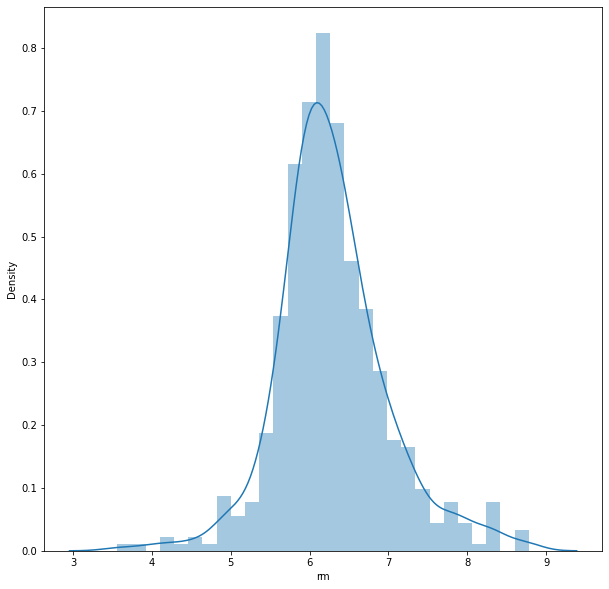

In [68]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(df['rm'])

<h4>Jointplot</h4>

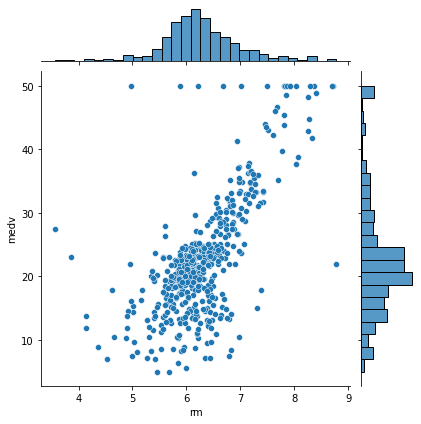

In [69]:
sns.jointplot(x='rm', y='medv', data=df)

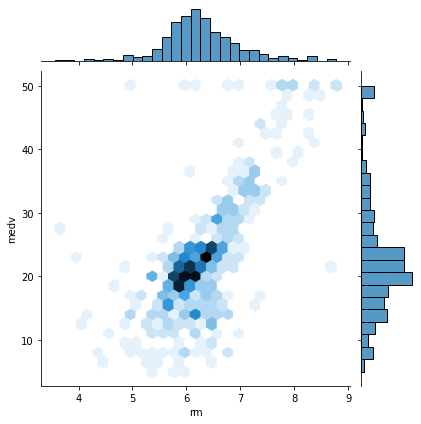

In [70]:
sns.jointplot(x='rm', y='medv', data=df, kind='hex')

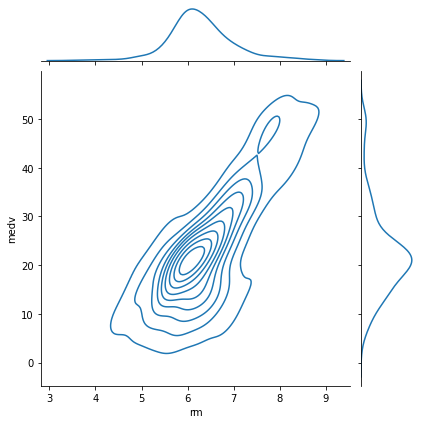

In [71]:
sns.jointplot(x='rm', y='medv', data=df, kind='kde')

<h4>"Парные диаграммы"</h4>

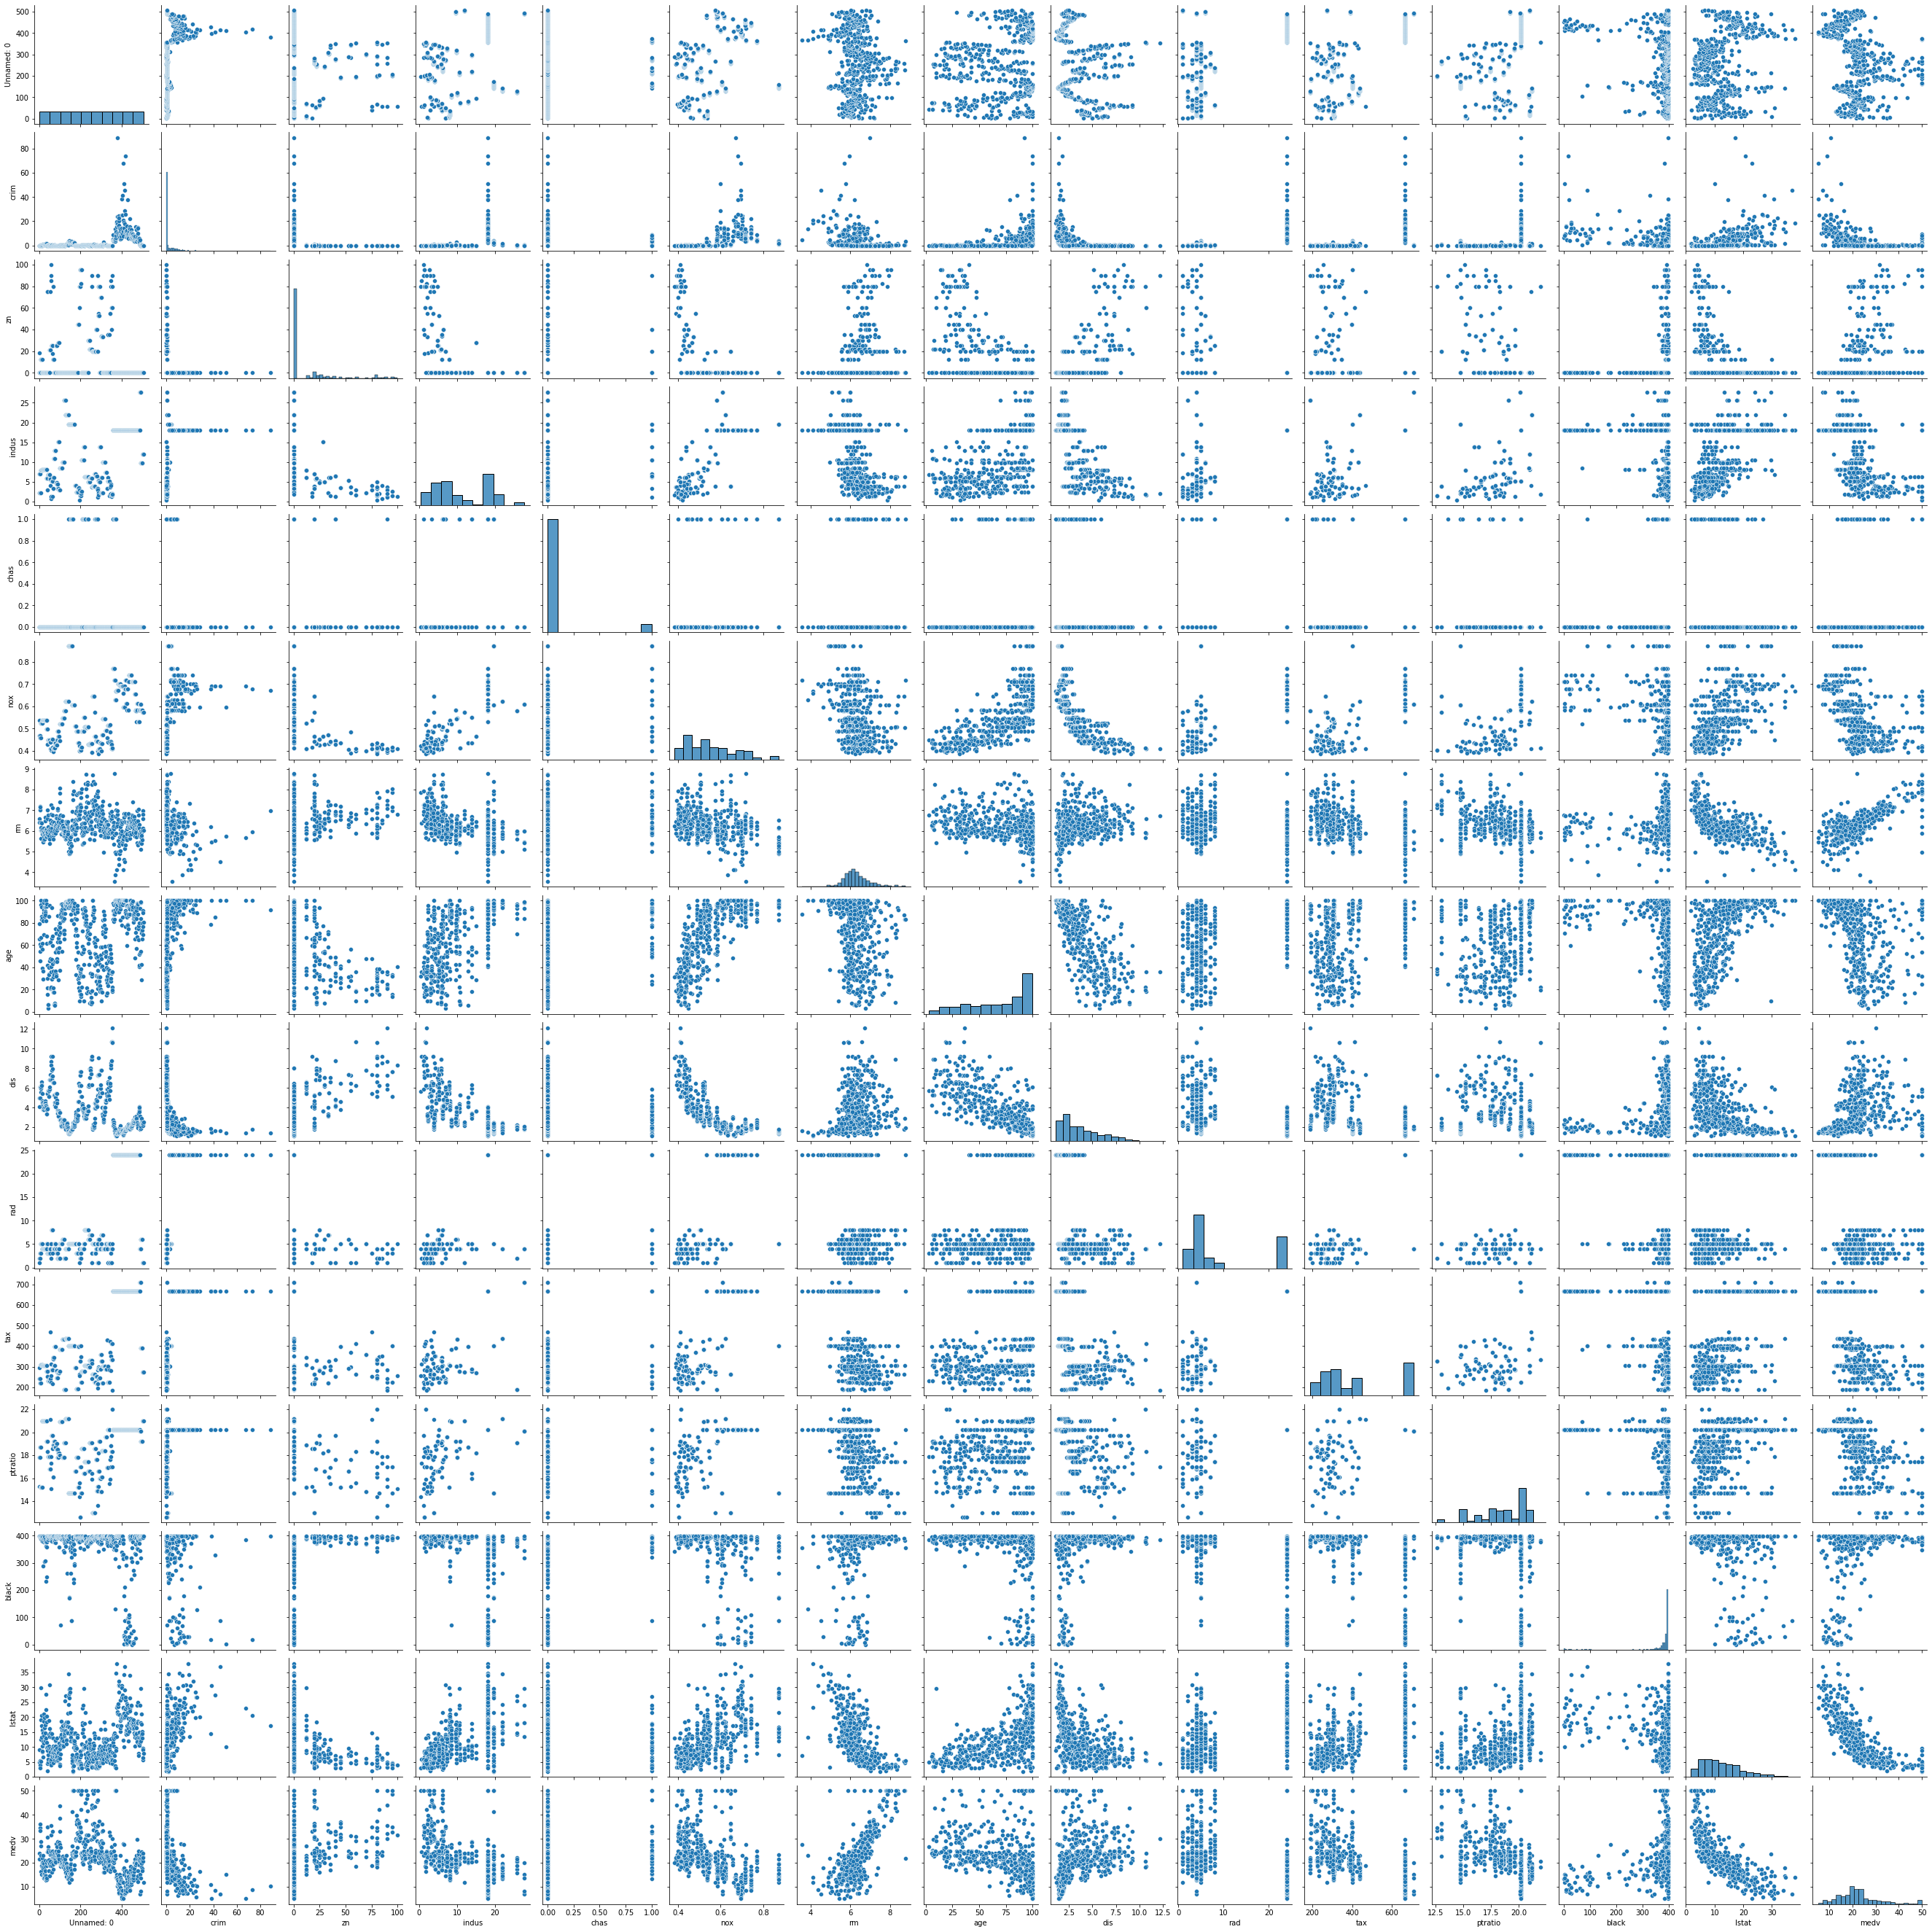

In [72]:
sns.pairplot(df)

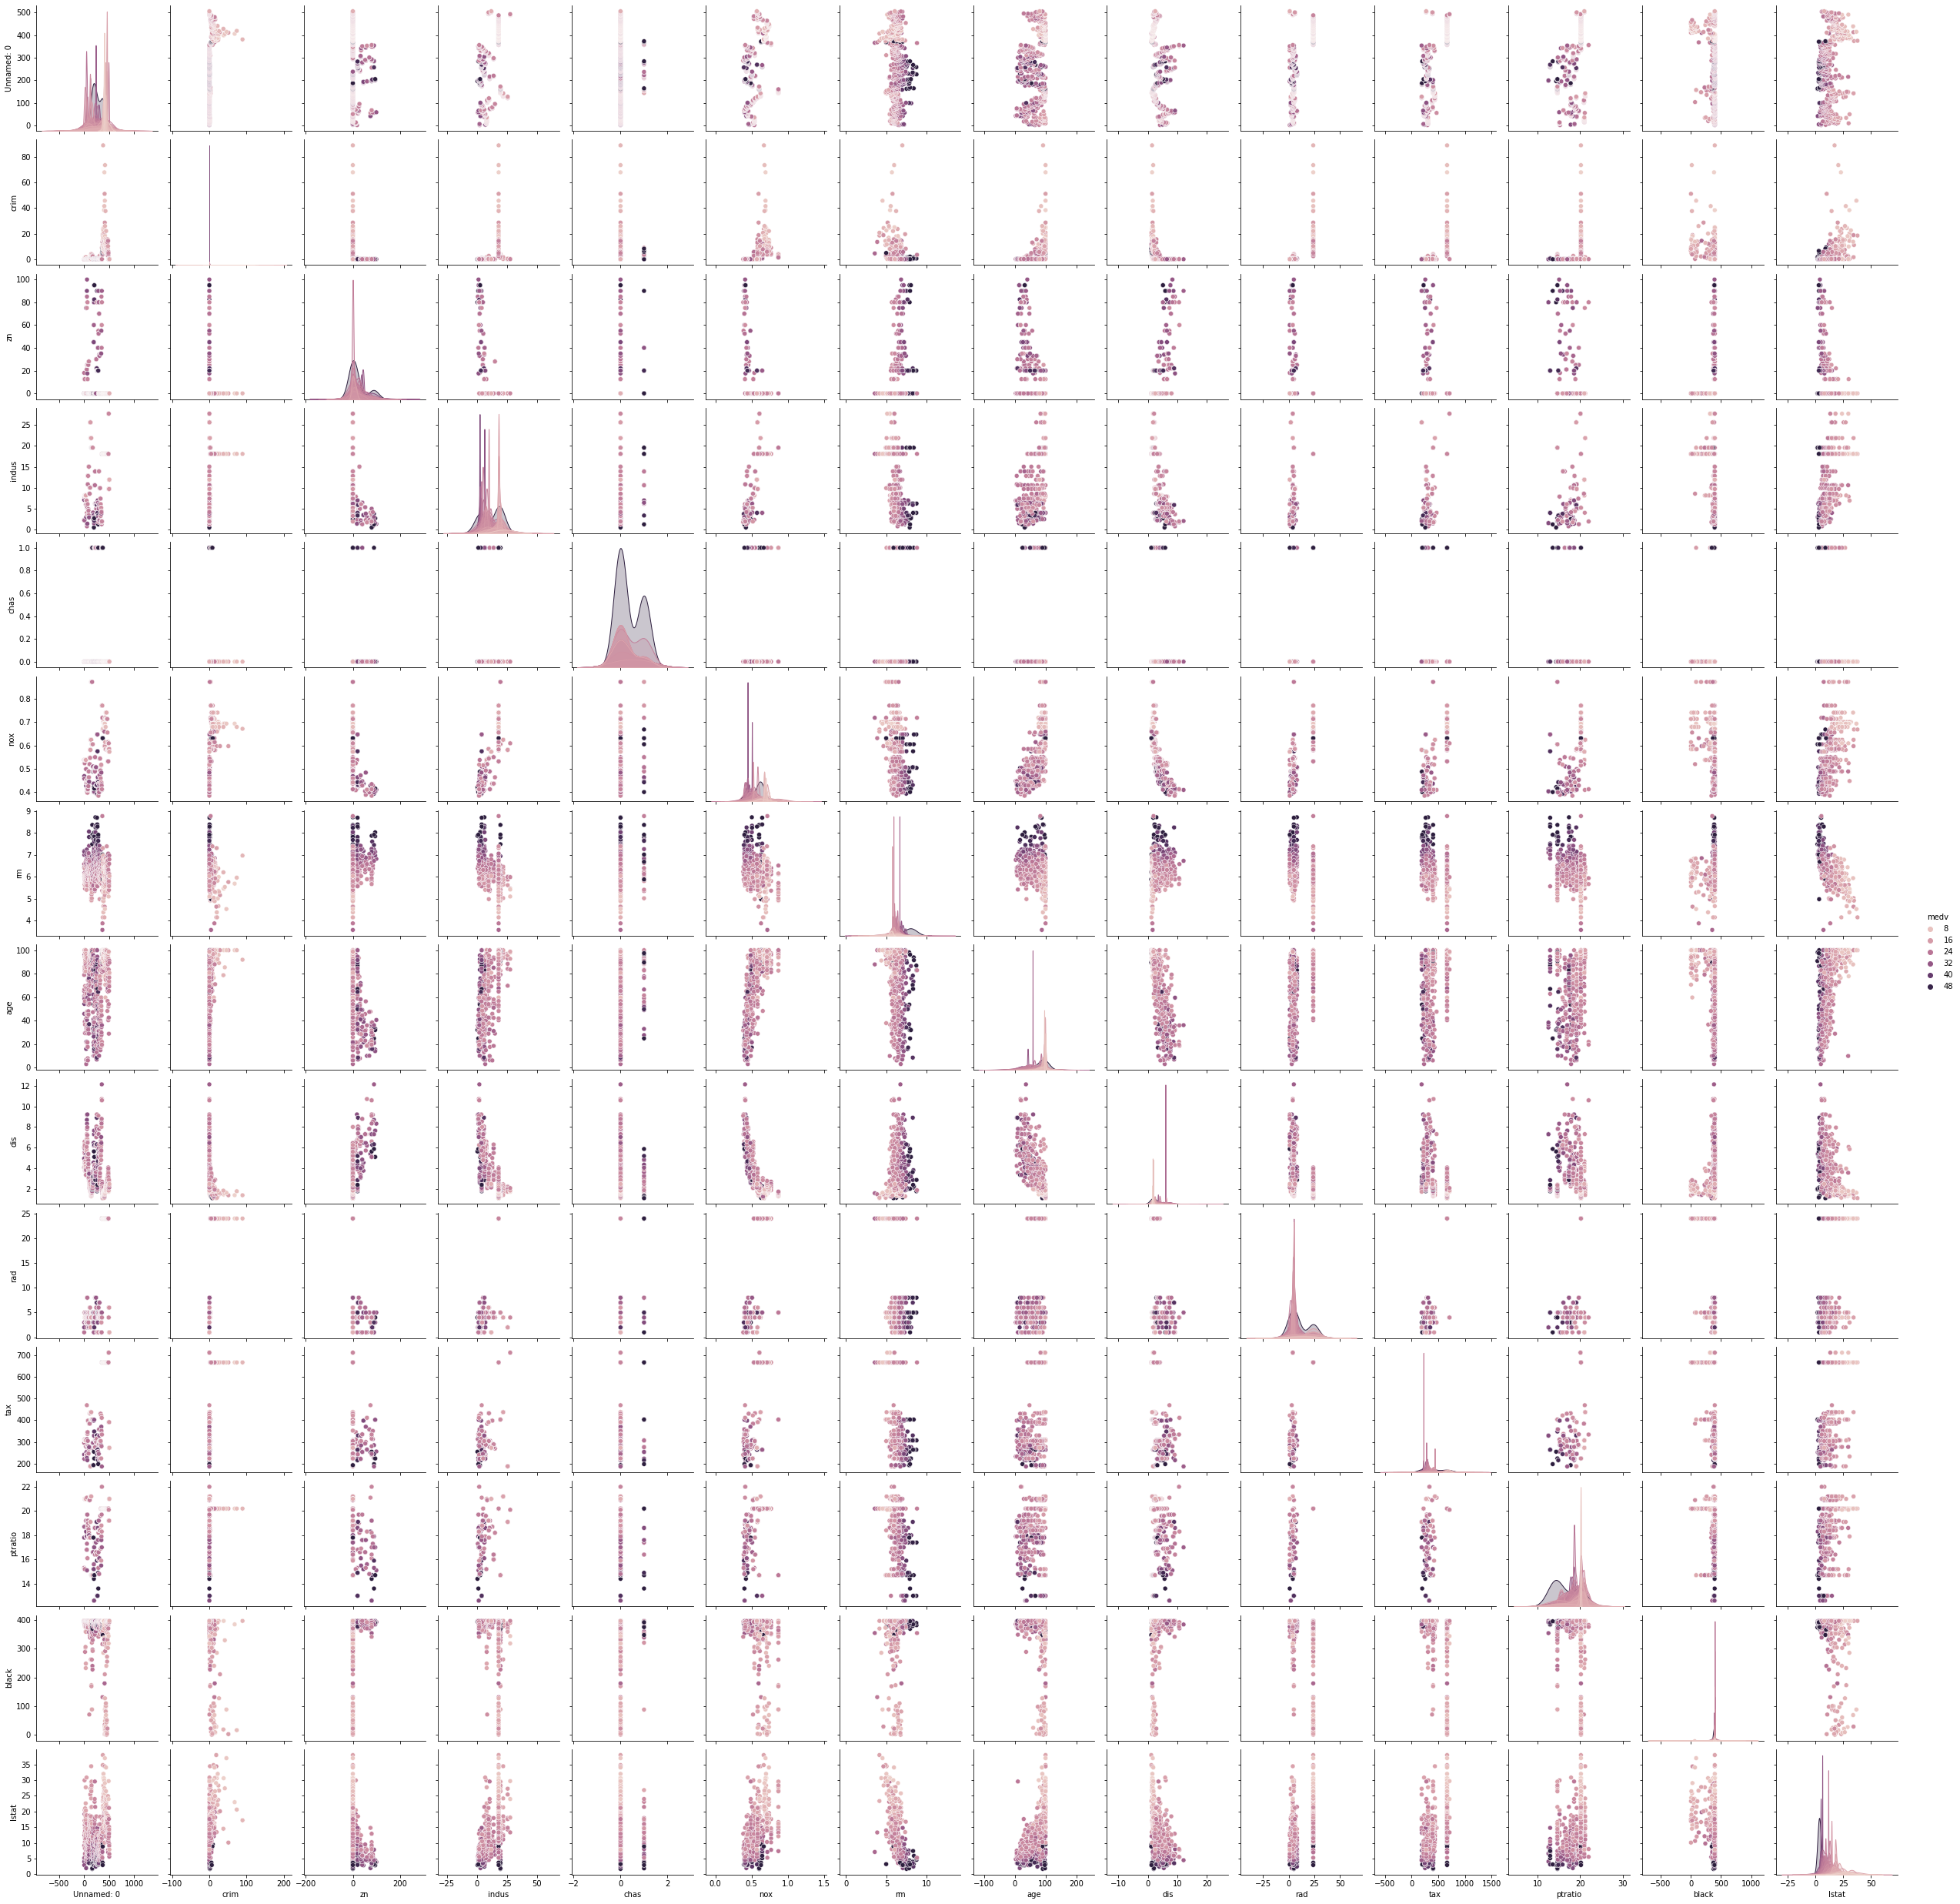

In [73]:
sns.pairplot(df, hue="medv")

<h4>Ящик с усами</h4>

<AxesSubplot:xlabel='medv'>

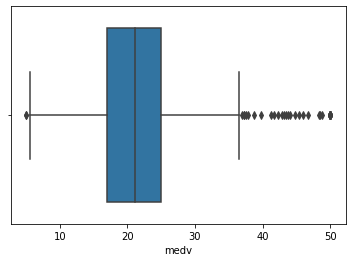

In [74]:
sns.boxplot(x=df['medv'])

<AxesSubplot:ylabel='medv'>

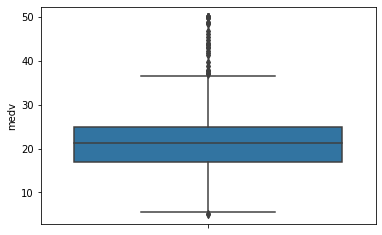

In [75]:
sns.boxplot(y=df['medv'])

<AxesSubplot:xlabel='chas', ylabel='medv'>

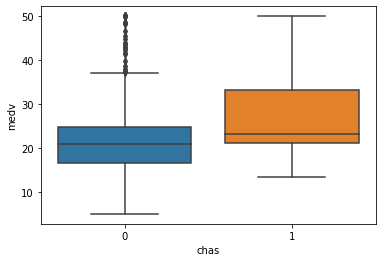

In [76]:
sns.boxplot(x='chas', y='medv', data=df)

<h3>Violin plot</h3>

<AxesSubplot:xlabel='medv'>

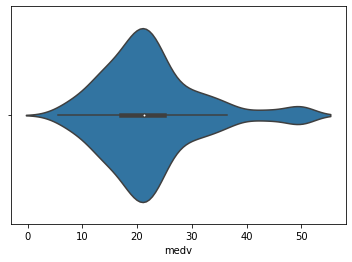

In [77]:
sns.violinplot(x=df['medv'])

<AxesSubplot:ylabel='medv'>

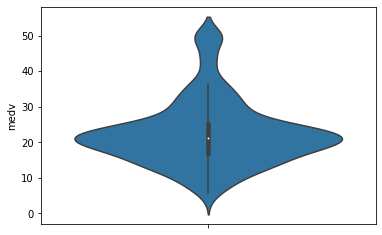

In [78]:
sns.violinplot(y=df['medv'])

<AxesSubplot:xlabel='chas', ylabel='medv'>

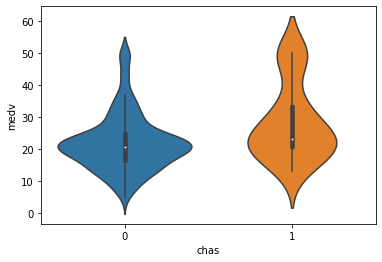

In [79]:
sns.violinplot(x='chas', y='medv', data=df)

<h3>4) Информация о корреляции признаков</h3>

In [80]:
df.corr()

Unnamed: 0      crim        zn     indus      chas       nox  \
Unnamed: 0    1.000000  0.407407 -0.103393  0.399439 -0.003759  0.398736   
crim          0.407407  1.000000 -0.200469  0.406583 -0.055892  0.420972   
zn           -0.103393 -0.200469  1.000000 -0.533828 -0.042697 -0.516604   
indus         0.399439  0.406583 -0.533828  1.000000  0.062938  0.763651   
chas         -0.003759 -0.055892 -0.042697  0.062938  1.000000  0.091203   
nox           0.398736  0.420972 -0.516604  0.763651  0.091203  1.000000   
rm           -0.079971 -0.219247  0.311991 -0.391676  0.091251 -0.302188   
age           0.203784  0.352734 -0.569537  0.644779  0.086518  0.731470   
dis          -0.302211 -0.379670  0.664408 -0.708027 -0.099176 -0.769230   
rad           0.686002  0.625505 -0.311948  0.595129 -0.007368  0.611441   
tax           0.666626  0.582764 -0.314563  0.720760 -0.035587  0.668023   
ptratio       0.291074  0.289946 -0.391679  0.383248 -0.121515  0.188933   
black        -0.295041 -0.385064  0.175520 -0.356977  0.048788 -0.380051   
lstat         0.258465  0.455621 -0.412995  0.603800 -0.053929  0.590879   
medv         -0.226604 -0.388305  0.360445 -0.483725  0.175260 -0.427321   

                  rm       age       dis       rad       tax   ptratio  \
Unnamed: 0 -0.079971  0.203784 -0.302211  0.686002  0.666626  0.291074   
crim       -0.219247  0.352734 -0.379670  0.625505  0.582764  0.289946   
zn          0.311991 -0.569537  0.664408 -0.311948 -0.314563 -0.391679   
indus      -0.391676  0.644779 -0.708027  0.595129  0.720760  0.383248   
chas        0.091251  0.086518 -0.099176 -0.007368 -0.035587 -0.121515   
nox        -0.302188  0.731470 -0.769230  0.611441  0.668023  0.188933   
rm          1.000000 -0.240265  0.205246 -0.209847 -0.292048 -0.355501   
age        -0.240265  1.000000 -0.747881  0.456022  0.506456  0.261515   
dis         0.205246 -0.747881  1.000000 -0.494588 -0.534432 -0.232471   
rad        -0.209847  0.456022 -0.494588  1.000000  0.910228  0.464741   
tax        -0.292048  0.506456 -0.534432  0.910228  1.000000  0.460853   
ptratio    -0.355501  0.261515 -0.232471  0.464741  0.460853  1.000000   
black       0.128069 -0.273534  0.291512 -0.444413 -0.441808 -0.177383   
lstat      -0.613808  0.602339 -0.496996  0.488676  0.543993  0.374044   
medv        0.695360 -0.376955  0.249929 -0.381626 -0.468536 -0.507787   

               black     lstat      medv  
Unnamed: 0 -0.295041  0.258465 -0.226604  
crim       -0.385064  0.455621 -0.388305  
zn          0.175520 -0.412995  0.360445  
indus      -0.356977  0.603800 -0.483725  
chas        0.048788 -0.053929  0.175260  
nox        -0.380051  0.590879 -0.427321  
rm          0.128069 -0.613808  0.695360  
age        -0.273534  0.602339 -0.376955  
dis         0.291512 -0.496996  0.249929  
rad        -0.444413  0.488676 -0.381626  
tax        -0.441808  0.543993 -0.468536  
ptratio    -0.177383  0.374044 -0.507787  
black       1.000000 -0.366087  0.333461  
lstat      -0.366087  1.000000 -0.737663  
medv        0.333461 -0.737663  1.000000

In [81]:
df.corr(method='pearson')

Unnamed: 0      crim        zn     indus      chas       nox  \
Unnamed: 0    1.000000  0.407407 -0.103393  0.399439 -0.003759  0.398736   
crim          0.407407  1.000000 -0.200469  0.406583 -0.055892  0.420972   
zn           -0.103393 -0.200469  1.000000 -0.533828 -0.042697 -0.516604   
indus         0.399439  0.406583 -0.533828  1.000000  0.062938  0.763651   
chas         -0.003759 -0.055892 -0.042697  0.062938  1.000000  0.091203   
nox           0.398736  0.420972 -0.516604  0.763651  0.091203  1.000000   
rm           -0.079971 -0.219247  0.311991 -0.391676  0.091251 -0.302188   
age           0.203784  0.352734 -0.569537  0.644779  0.086518  0.731470   
dis          -0.302211 -0.379670  0.664408 -0.708027 -0.099176 -0.769230   
rad           0.686002  0.625505 -0.311948  0.595129 -0.007368  0.611441   
tax           0.666626  0.582764 -0.314563  0.720760 -0.035587  0.668023   
ptratio       0.291074  0.289946 -0.391679  0.383248 -0.121515  0.188933   
black        -0.295041 -0.385064  0.175520 -0.356977  0.048788 -0.380051   
lstat         0.258465  0.455621 -0.412995  0.603800 -0.053929  0.590879   
medv         -0.226604 -0.388305  0.360445 -0.483725  0.175260 -0.427321   

                  rm       age       dis       rad       tax   ptratio  \
Unnamed: 0 -0.079971  0.203784 -0.302211  0.686002  0.666626  0.291074   
crim       -0.219247  0.352734 -0.379670  0.625505  0.582764  0.289946   
zn          0.311991 -0.569537  0.664408 -0.311948 -0.314563 -0.391679   
indus      -0.391676  0.644779 -0.708027  0.595129  0.720760  0.383248   
chas        0.091251  0.086518 -0.099176 -0.007368 -0.035587 -0.121515   
nox        -0.302188  0.731470 -0.769230  0.611441  0.668023  0.188933   
rm          1.000000 -0.240265  0.205246 -0.209847 -0.292048 -0.355501   
age        -0.240265  1.000000 -0.747881  0.456022  0.506456  0.261515   
dis         0.205246 -0.747881  1.000000 -0.494588 -0.534432 -0.232471   
rad        -0.209847  0.456022 -0.494588  1.000000  0.910228  0.464741   
tax        -0.292048  0.506456 -0.534432  0.910228  1.000000  0.460853   
ptratio    -0.355501  0.261515 -0.232471  0.464741  0.460853  1.000000   
black       0.128069 -0.273534  0.291512 -0.444413 -0.441808 -0.177383   
lstat      -0.613808  0.602339 -0.496996  0.488676  0.543993  0.374044   
medv        0.695360 -0.376955  0.249929 -0.381626 -0.468536 -0.507787   

               black     lstat      medv  
Unnamed: 0 -0.295041  0.258465 -0.226604  
crim       -0.385064  0.455621 -0.388305  
zn          0.175520 -0.412995  0.360445  
indus      -0.356977  0.603800 -0.483725  
chas        0.048788 -0.053929  0.175260  
nox        -0.380051  0.590879 -0.427321  
rm          0.128069 -0.613808  0.695360  
age        -0.273534  0.602339 -0.376955  
dis         0.291512 -0.496996  0.249929  
rad        -0.444413  0.488676 -0.381626  
tax        -0.441808  0.543993 -0.468536  
ptratio    -0.177383  0.374044 -0.507787  
black       1.000000 -0.366087  0.333461  
lstat      -0.366087  1.000000 -0.737663  
medv        0.333461 -0.737663  1.000000

In [82]:
df.corr(method='kendall')

Unnamed: 0      crim        zn     indus      chas       nox  \
Unnamed: 0    1.000000  0.287507 -0.119015  0.210280 -0.003072  0.270223   
crim          0.287507  1.000000 -0.462057  0.521014  0.033948  0.603361   
zn           -0.119015 -0.462057  1.000000 -0.535468 -0.039419 -0.511464   
indus         0.210280  0.521014 -0.535468  1.000000  0.075889  0.612030   
chas         -0.003072  0.033948 -0.039419  0.075889  1.000000  0.056387   
nox           0.270223  0.603361 -0.511464  0.612030  0.056387  1.000000   
rm           -0.025624 -0.211718  0.278134 -0.291318  0.048080 -0.215633   
age           0.131520  0.497297 -0.429389  0.489070  0.055616  0.589608   
dis          -0.214680 -0.539878  0.478524 -0.565137 -0.065619 -0.683930   
rad           0.439464  0.563969 -0.234663  0.353967  0.021739  0.434828   
tax           0.360426  0.544956 -0.289911  0.483228 -0.037655  0.453258   
ptratio       0.222774  0.312768 -0.361607  0.336612 -0.115694  0.278678   
black        -0.108716 -0.264378  0.128177 -0.192017 -0.033277 -0.202430   
lstat         0.159116  0.454837 -0.386818  0.465980 -0.041344  0.452005   
medv         -0.170050 -0.403964  0.339989 -0.418430  0.115202 -0.394995   

                  rm       age       dis       rad       tax   ptratio  \
Unnamed: 0 -0.025624  0.131520 -0.214680  0.439464  0.360426  0.222774   
crim       -0.211718  0.497297 -0.539878  0.563969  0.544956  0.312768   
zn          0.278134 -0.429389  0.478524 -0.234663 -0.289911 -0.361607   
indus      -0.291318  0.489070 -0.565137  0.353967  0.483228  0.336612   
chas        0.048080  0.055616 -0.065619  0.021739 -0.037655 -0.115694   
nox        -0.215633  0.589608 -0.683930  0.434828  0.453258  0.278678   
rm          1.000000 -0.187611  0.179801 -0.076569 -0.190532 -0.223194   
age        -0.187611  1.000000 -0.609836  0.306201  0.360311  0.251857   
dis         0.179801 -0.609836  1.000000 -0.361892 -0.381988 -0.223486   
rad        -0.076569  0.306201 -0.361892  1.000000  0.558107  0.251913   
tax        -0.190532  0.360311 -0.381988  0.558107  1.000000  0.287769   
ptratio    -0.223194  0.251857 -0.223486  0.251913  0.287769  1.000000   
black       0.032951 -0.154056  0.168631 -0.214364 -0.241606 -0.042152   
lstat      -0.468231  0.485359 -0.409347  0.287943  0.384191  0.330335   
medv        0.482829 -0.387758  0.313115 -0.248115 -0.414650 -0.398789   

               black     lstat      medv  
Unnamed: 0 -0.108716  0.159116 -0.170050  
crim       -0.264378  0.454837 -0.403964  
zn          0.128177 -0.386818  0.339989  
indus      -0.192017  0.465980 -0.418430  
chas       -0.033277 -0.041344  0.115202  
nox        -0.202430  0.452005 -0.394995  
rm          0.032951 -0.468231  0.482829  
age        -0.154056  0.485359 -0.387758  
dis         0.168631 -0.409347  0.313115  
rad        -0.214364  0.287943 -0.248115  
tax        -0.241606  0.384191 -0.414650  
ptratio    -0.042152  0.330335 -0.398789  
black       1.000000 -0.145430  0.126955  
lstat      -0.145430  1.000000 -0.668656  
medv        0.126955 -0.668656  1.000000

In [83]:
df.corr(method='spearman')

Unnamed: 0      crim        zn     indus      chas       nox  \
Unnamed: 0    1.000000  0.461037 -0.160505  0.324621 -0.003759  0.432492   
crim          0.461037  1.000000 -0.571660  0.735524  0.041537  0.821465   
zn           -0.160505 -0.571660  1.000000 -0.642811 -0.041937 -0.634828   
indus         0.324621  0.735524 -0.642811  1.000000  0.089841  0.791189   
chas         -0.003759  0.041537 -0.041937  0.089841  1.000000  0.068426   
nox           0.432492  0.821465 -0.634828  0.791189  0.068426  1.000000   
rm           -0.035641 -0.309116  0.361074 -0.415301  0.058813 -0.310344   
age           0.208323  0.704140 -0.544423  0.679487  0.067792  0.795153   
dis          -0.373499 -0.744986  0.614627 -0.757080 -0.080248 -0.880015   
rad           0.588481  0.727807 -0.278767  0.455507  0.024579  0.586429   
tax           0.536928  0.729045 -0.371394  0.664361 -0.044486  0.649527   
ptratio       0.297897  0.465283 -0.448475  0.433710 -0.136065  0.391309   
black        -0.154474 -0.360555  0.163135 -0.285840 -0.039810 -0.296662   
lstat         0.257542  0.634760 -0.490074  0.638747 -0.050575  0.636828   
medv         -0.273633 -0.558891  0.438179 -0.578255  0.140612 -0.562609   

                  rm       age       dis       rad       tax   ptratio  \
Unnamed: 0 -0.035641  0.208323 -0.373499  0.588481  0.536928  0.297897   
crim       -0.309116  0.704140 -0.744986  0.727807  0.729045  0.465283   
zn          0.361074 -0.544423  0.614627 -0.278767 -0.371394 -0.448475   
indus      -0.415301  0.679487 -0.757080  0.455507  0.664361  0.433710   
chas        0.058813  0.067792 -0.080248  0.024579 -0.044486 -0.136065   
nox        -0.310344  0.795153 -0.880015  0.586429  0.649527  0.391309   
rm          1.000000 -0.278082  0.263168 -0.107492 -0.271898 -0.312923   
age        -0.278082  1.000000 -0.801610  0.417983  0.526366  0.355384   
dis         0.263168 -0.801610  1.000000 -0.495806 -0.574336 -0.322041   
rad        -0.107492  0.417983 -0.495806  1.000000  0.704876  0.318330   
tax        -0.271898  0.526366 -0.574336  0.704876  1.000000  0.453345   
ptratio    -0.312923  0.355384 -0.322041  0.318330  0.453345  1.000000   
black       0.053660 -0.228022  0.249595 -0.282533 -0.329843 -0.072027   
lstat      -0.640832  0.657071 -0.564262  0.394322  0.534423  0.467259   
medv        0.633576 -0.547562  0.445857 -0.346776 -0.562411 -0.555905   

               black     lstat      medv  
Unnamed: 0 -0.154474  0.257542 -0.273633  
crim       -0.360555  0.634760 -0.558891  
zn          0.163135 -0.490074  0.438179  
indus      -0.285840  0.638747 -0.578255  
chas       -0.039810 -0.050575  0.140612  
nox        -0.296662  0.636828 -0.562609  
rm          0.053660 -0.640832  0.633576  
age        -0.228022  0.657071 -0.547562  
dis         0.249595 -0.564262  0.445857  
rad        -0.282533  0.394322 -0.346776  
tax        -0.329843  0.534423 -0.562411  
ptratio    -0.072027  0.467259 -0.555905  
black       1.000000 -0.210562  0.185664  
lstat      -0.210562  1.000000 -0.852914  
medv        0.185664 -0.852914  1.000000

<AxesSubplot:>

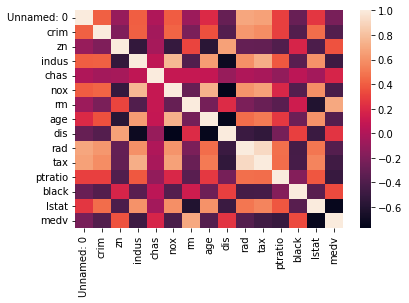

In [84]:
sns.heatmap(df.corr())

<AxesSubplot:>

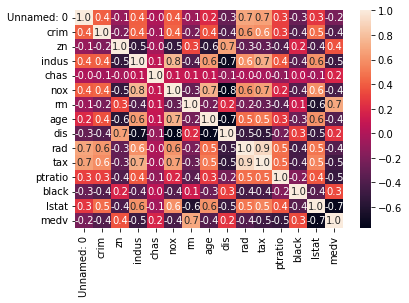

In [85]:
sns.heatmap(df.corr(), annot=True, fmt='.1f')

<AxesSubplot:>

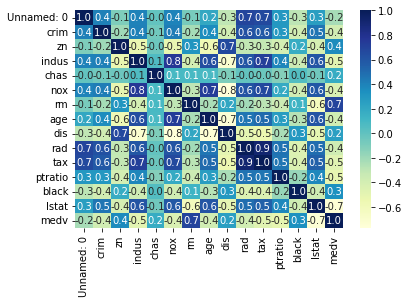

In [86]:
sns.heatmap(df.corr(), annot=True, fmt='.1f', cmap='YlGnBu')

/var/folders/k8/94s33qgs47b0y9dc3zwr8t240000gn/T/ipykernel_62257/1732128229.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df.corr(), dtype=np.bool)


<AxesSubplot:>

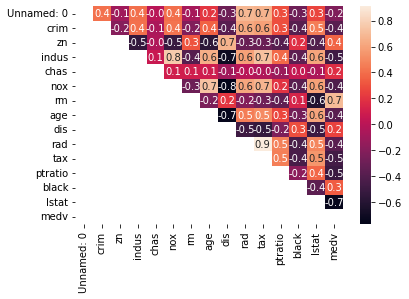

In [87]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.tril_indices_from(mask)] = True
sns.heatmap(df.corr(), mask=mask, annot=True, fmt='.1f')

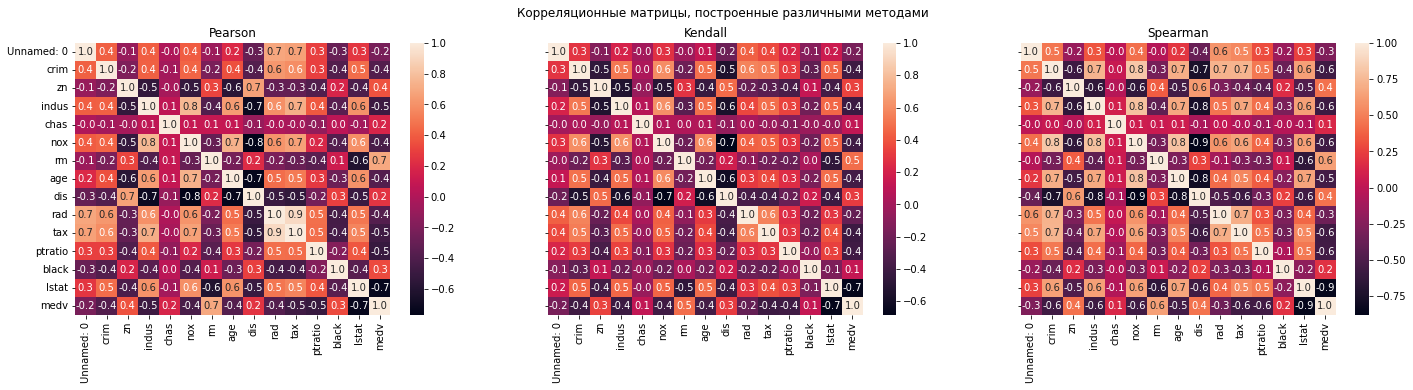

In [88]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(24,5))
sns.heatmap(df.corr(method='pearson'), ax=ax[0], annot=True, fmt='.1f')
sns.heatmap(df.corr(method='kendall'), ax=ax[1], annot=True, fmt='.1f')
sns.heatmap(df.corr(method='spearman'), ax=ax[2], annot=True, fmt='.1f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')